## Трек «CV-инженер» 
### Skillfactory: DSPR-19
### Модуль 1. Работа с изображениями

### 1. Что вас ждёт в этом модуле?

→ Не секрет, что проектирование архитектуры модели — это только 50% успеха в решении задачи Data Science. Оставшаяся половина — правильная подготовка данных. 

Этот модуль посвящен знакомству со способами предобработки изображений для различных задач компьютерного зрения. 

### В ЭТОМ МОДУЛЕ МЫ РАЗБЕРЁМ:

- Что представляет из себя изображение?

- Какими способами можно обработать и трансформировать изображение?

- gКакие требования к картинкам существуют в зависимости от задачи компьютерного зрения?

- Что такое аугментации и зачем они нужны?

### ВЫ НАУЧИТЕСЬ:

- Загружать изображения, делать предобработку и трансформировать картинки с помощью библиотек openCV и scikit-image.

- Пользоваться инструментами albumentations и torchvision.transforms для аугментации и расширения тренировочного датасета.

- Использовать популярные сервисы для разметки изображений.

- Писать класс Dataset для подготовки загрузки датасета перед переходом к задаче.

✏️ В конце этого модуля на основе этих навыков вы подготовите датасет для решения задачи сегментации изображений.

Для освоения модуля может потребоваться повторить такие темы:

→ Объектно-ориентированное программирование. Вспомните, какие требования предъявляются к кастомным классам, которые вы пишете на Python.

→ Работа с фреймворком PyTorch для реализации моделей.

→ Задача сегментации в компьютерном зрении и методы её решения — для финального задания модуля.

#### АВТОР МОДУЛЯ

Андрей Казначеев,
NLP Researcher, Сбер

### 2. Что такое изображение?

→ Прежде чем приступить к способам обработки изображений, необходимо вспомнить, что такое изображение. 


**Изображение** — это матрица **интенсивностей** света, пришедшего на соответствующий пиксель матрицы фотоаппарата. 

В случае _монохромного_ изображения — это одна двумерная матрица, в которой хранятся **числа от 0 до 255**, где 0 соответствует чёрному цвету, а 255 — белому.

### КАК ПОЛУЧАЕТСЯ ЦВЕТНОЕ ИЗОБРАЖЕНИЕ?

Представьте, что мы делаем фото на смартфоне. Свет должен попасть на светочувствительную матрицу. Но до этого он проходит через цветовые фильтры. 

Как правило, цветовые фильтры — это ячейки, соответствующие трём основным цветам, через сочетание которых можно получить практически все цвета, воспринимаемые глазом человека: красный (red), зелёный (green) и синий (blue). Каждый фильтр отсекает не соответствующее его цвету излучение, и на матрицу попадает излучение красного, синего или зелёного цвета. Как вы уже догадались, речь идет о цветовой модели RGB.

Цветные RGB-изображения компьютер видит как трёхмерную матрицу интенсивностей, а точнее — как три двумерные матрицы интенсивностей соответствующих цветовых каналов (Red-Green-Blue).

Можно отрисовать различные каналы изображения по отдельности, чтоб увидеть, из чего состоит наше оригинальное изображение героев Футурамы.

### Задание 2.1
Что означают числа в матрице, которую представляют из себя изображения?
Введите текстовый ответ кириллицей.  
Ответ: интенсивность

### ЦВЕТОВЫЕ МОДЕЛИ

Давайте подробнее остановимся на цветовых моделях.

### RGB (RED, GREEN, BLUE)


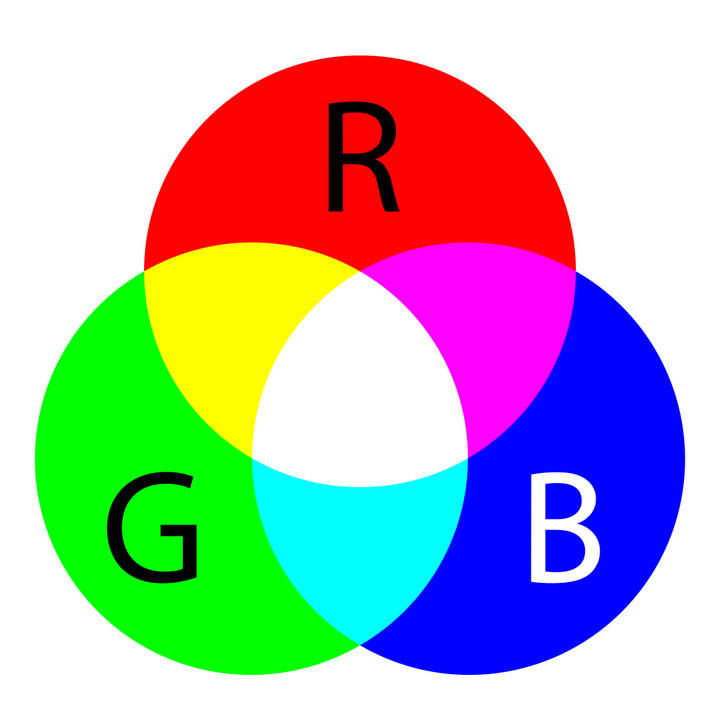

Одна из самых распространённых цветовых моделей. В её основе лежит воспроизведение любого цвета путем сложения трёх основных компонентов: красного (Red), зелёного (Green) и синего (Blue). Каждый компонент выражается через **число от 0 до 255**, которое характеризует количество этого компонента в конечном цвете.


### CMY/CMYK (CYAN, MAGENTA, YELLOW + BLACK)

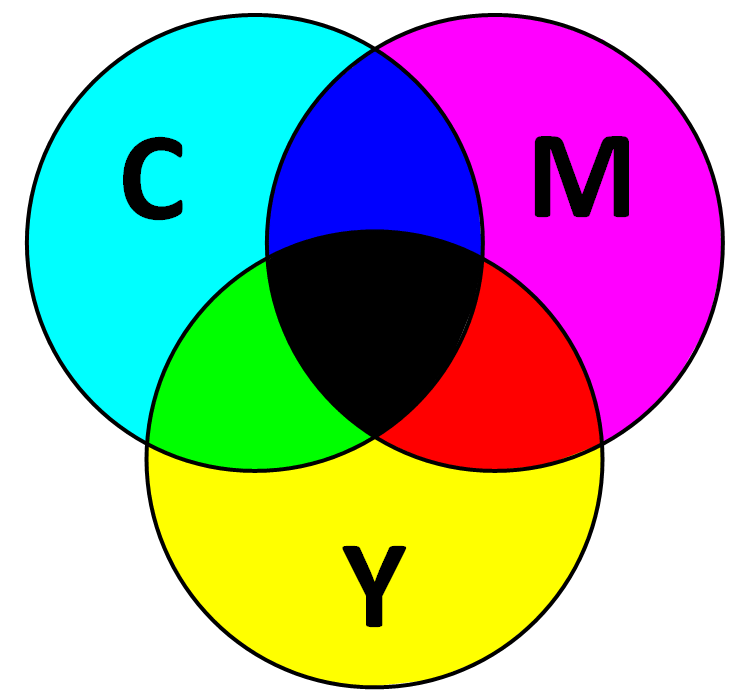

**Субтрактивная модель** — это модель, основанная на вычитании основных цветов из белого. 

**Белый цвет - RGB = CMY**

Буква K означает key color, или просто чёрный цвет. 

Эта цветовая модель создавалась для типографских нужд, где гораздо удобнее рассчитывать цвет по количеству отражённого от бумаги света, а не по количеству поглощённого (как в RGB). Референсный чёрный цвет в модель добавили, так как не очень точно получалось сделать чёрный цвет путем смешения различных красок. 

→ Эта модель почти не используется в обработке изображений: про неё важно знать лишь для общего развития.



### HSV/HSB (HUE, SATURATION, VALUE OR BRIGHTNESS)

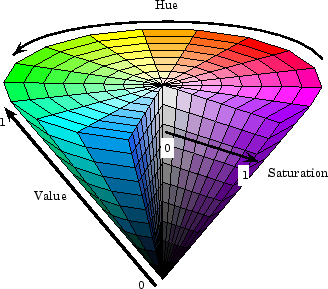
	
Эта цветовая модель может быть представлена как конус.

Что есть что?

**Hue** — цветовой тон. **Варьируется от 0 до 360.**

Цвет кодируется углом окружности. Можно заметить, что, в отличие от предыдущих цветовых моделей, здесь цвет пикселя характеризуется **одним числом.**

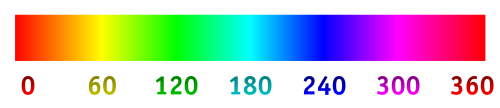

**Saturation** — насыщенность. Варьируется **от 0 до 1**, иногда **от 0 до 100**. Чем ближе параметр к 0, тем ближе цвет к нейтральному серому; чем ближе к 1, тем более насыщенным выглядит цвет.

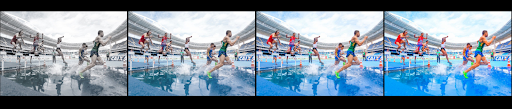

**Value/Brightness** — яркость. Также задаётся **от 0 до 1.**

Преимуществом этой цветовой модели является разделение информации о цвете и яркости. Например, если мы хотим выполнить выравнивание гистограммы яркости, то цвета меняться не должны. Это легко обеспечить в HSV-модели. Также эта модель лучше подходит для выделения объектов на изображении, потому что здесь очень просто задать порог, какие тона мы ищем.

❗️ Таким образом, возможно решить задачу сегментации дорожных знаков, так как дорожные знаки имеют стандартизированные цвета, и, задавая довольно узкий порог по цветовому тону, можно легко их выделять на изображении.

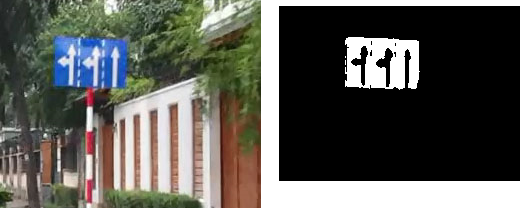

### Задание 2.2
Какой цветовой моделью можно выделить один цвет на изображении по порогу цветового тона?  
Ответ: HSV

⭐️ Итак, мы рассмотрели основные варианты представления цветных изображений. Теперь давайте познакомимся с одним из самых популярных инструментов для работы с такими изображениями — библиотекой openCV.

### ⚪️3. Скринкаст: openCV


→ Скачать ноутбук к скринкасту (https://github.com/luhakv/cv_engr/blob/master/opencv_demo_ipynb_.ipynb)

	
**Библиотека OpenCV (Open Source Computer Vision Library)** предлагает широкий набор методов, функций и классов для обработки изображений алгоритмами компьютерного зрения.

→ Документация библиотеки OpenCV (https://docs.opencv.org/master/)

Она включает в себя несколько модулей для различных задач CV. В этом модуле мы разберём базовые операции для трансформации изображений. 

Вот несколько примеров таких операций:

cv2.imread — чтение изображения  
cv2.resize — изменение размера изображения  
cv2.rectangle — рисование прямоугольников    
cv2.putText — добавление текста на изображение  
cv2.addWeighted — способ получить смесь изображений, в том числе «смешать» картинку с шумом  
cv2.GaussianBlur — гауссово сглаживание, один из популярных методов размытия картинки  
cv2.medianBlur — сглаживание по медиане  

### ✏️ ПРАКТИКА

Скачайте (https://github.com/luhakv/cv_engr/blob/master/img/peshehod.jpeg) изображение дорожного знака Пешеходный переход и добавьте его в свою директорию.

Загрузим картинку и отрисуем её:

In [ ]:
pesh = cv2.imread('peshehod.jpeg')
plt.imshow(pesh) #перепутаны местами каналы, не забудьте!

Дальнейшие действия по проекту в ноутбуке в colab: https://github.com/luhakv/cv_engr/blob/master/opencv_demo_done.ipynb

### Задание 3.1
Для изображения знака сделайте threshold по порогу выше 180. В строку ниже введите целое число, полученное в результате выполнения кода, данного ниже.  

In [ ]:
print(np.sum(thresholded_img)/255)

Ответ: 58546

### Задание 3.2
Вам нужно локализовать на изображении дорожный знак с помощью цветового порога. В результате получится маска изображения, на которой будет выделен только знак и небольшой шум на остальной части изображения.

Рекомендуем перевести изображение в HSV и найти информацию о функции inRange.

Финальную маску назовите result_image.

Формат ответа: X.X

Введите в поле для ответа число, которое получится после выполнения кода ниже:

In [ ]:
np.sum(result_image[120:250, 120:250])/np.sum(result_image)

Ответ: 0.9

### Задание 3.3
С помощью OpenCV можно получить доступ к различным свойствам изображения, например количеству строк, столбцов и каналов в тензоре картинки; типу данных изображения; количеству пикселей.

В документации библиотеки найдите способ посчитать количество пикселей на картинке с дорожным знаком. Ответом должно стать целое число.  

Ответ: 516096

### 4. Image Processing

→ В прошлых юнитах мы рассмотрели, как цветное изображение может быть представлено в компьютере, и изучили возможности классной библиотеки OpenCV. Теперь необходимо более подробно рассказать о свойствах изображений, таких как яркость, контрастность, баланс белого и гамма-коррекциях.

### БАЛАНС БЕЛОГО

**Баланс белого** — это процесс коррекции цветов на изображении до тех цветов, которые человек видит в естественных условиях (или до тех, которые лучше выглядят). 

Неверный баланс белого может породить фото фиолетовых или зеленоватых оттенков.

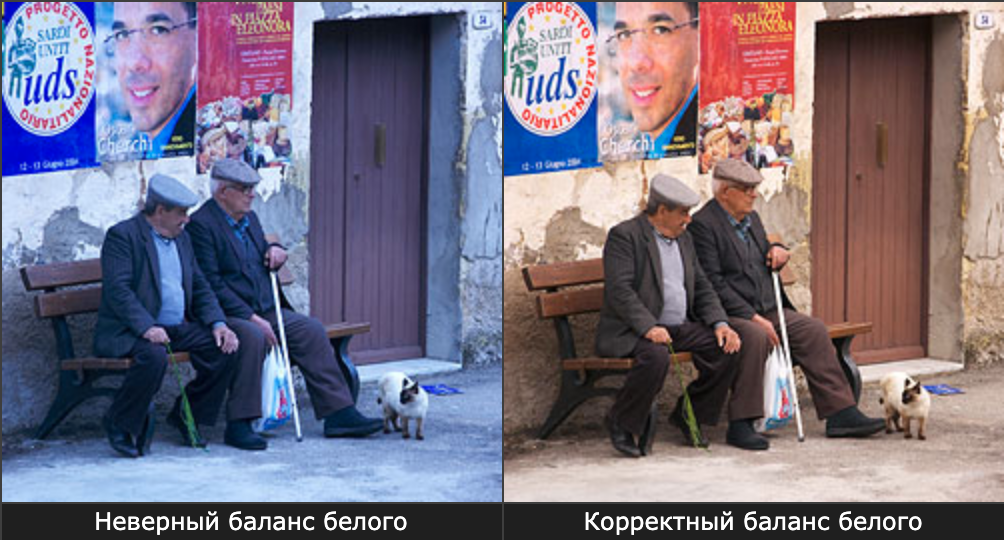

### ЯРКОСТЬ

**Яркость** — световая характеристика тел. Яркость — это отношение силы света, излучаемого поверхностью, к площади её проекции на плоскости, перпендикулярной оси наблюдения. Говоря простым языком, она выражает, насколько пиксель отличается от пикселя черного цвета.

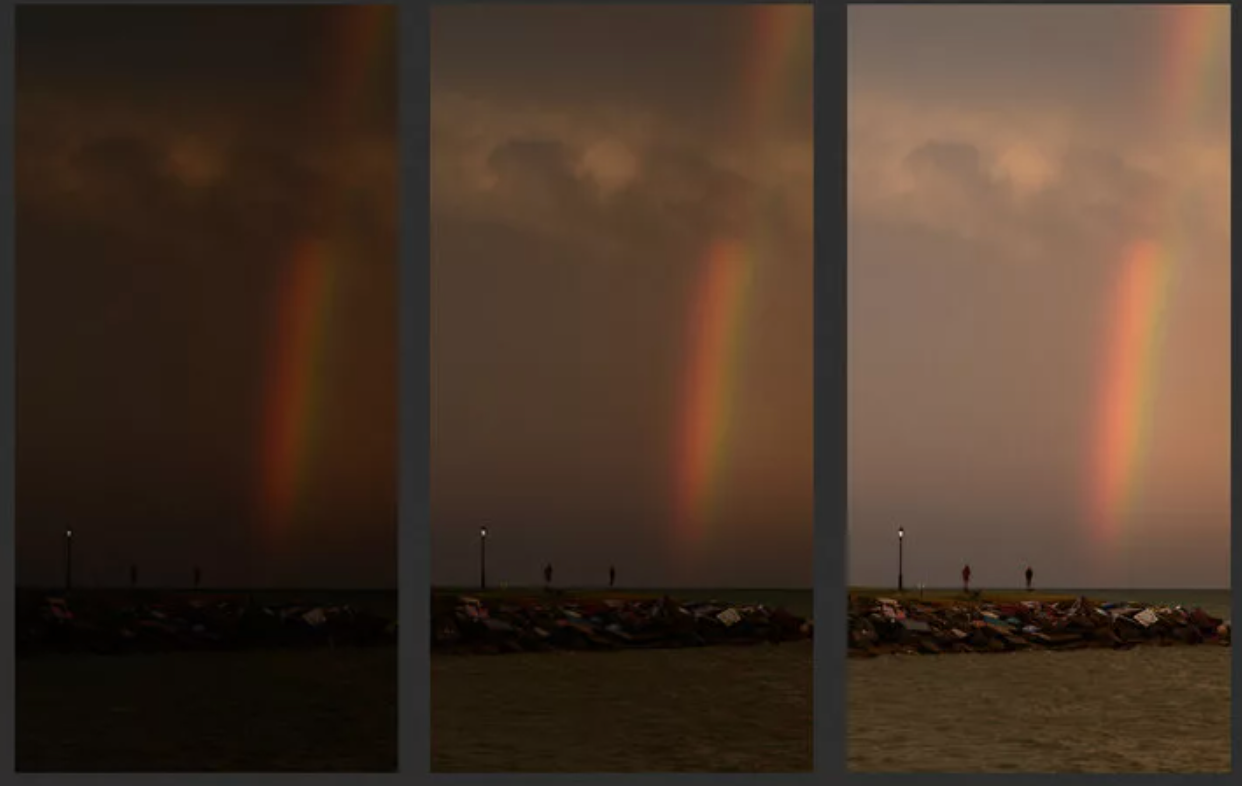

Существует также **гистограмма яркости изображения** — это график статистического распределения элементов цифрового изображения с различной яркостью, в котором по горизонтальной оси представлена яркость, а по вертикали — относительное число пикселей с конкретным значением яркости. 

Эти гистограммы применяются в обработке изображений. Например, для приведения яркости одного изображения к яркости другого.

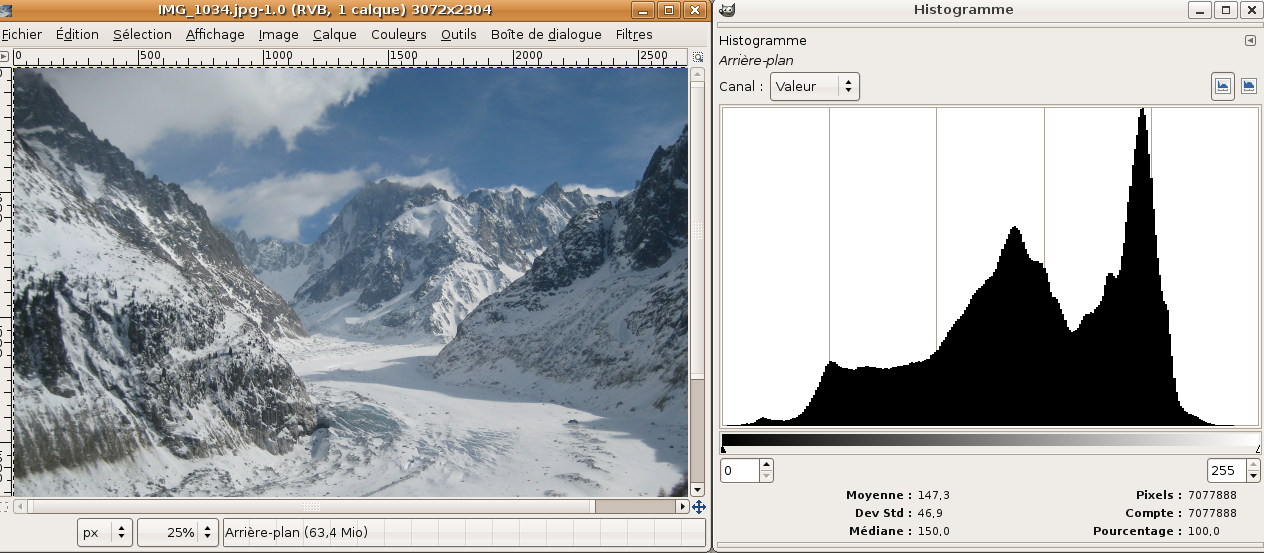

### КОНТРАСТНОСТЬ

	
**Контрастность** — различимость предмета наблюдения от окружающего его фона (монохроматическое излучение). 

**Цветовая контрастность** — разновидность оптической контрастности, связанная с разницей цветовых оттенков. Говоря простым языком, это разница расположенными рядом цветами. Чем выше контрастность, тем более резко мы наблюдаем переход от одного цвета к другому (иногда контрастность срабатывает как повышение резкости).

### ГАММА-КОРРЕКЦИЯ

Основная идея состоит в том, что глаз воспринимает увеличение яркости не в линейном масштабе.

Строго говоря, если в два раза увеличить количество фотонов, которые попадают на глаз, то мы скажем, что изображение стало немного светлее. В случае же цифровой камеры, яркость увеличится вдвое.

Под **гамма-коррекцией** мы подразумеваем преобразование светочувствительности камеры под наши глаза. 

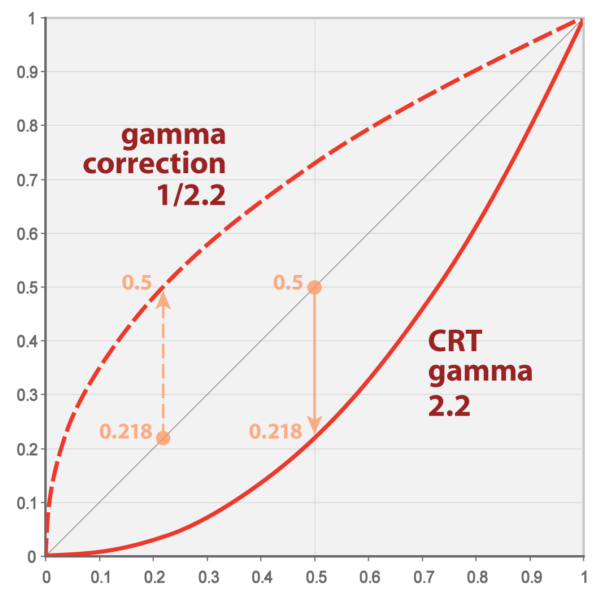

Это делается с помощью степенной функции:

где  — это итоговая яркость, а  — это исходная/действительная яркость.

У старых мониторов, работающих на электронно-лучевой трубке, была та же проблема, но с обратным показателем в степени (). Сейчас все мониторы стандартизированы под .

Ниже пример, как меняется изображение при применении разной гаммы.

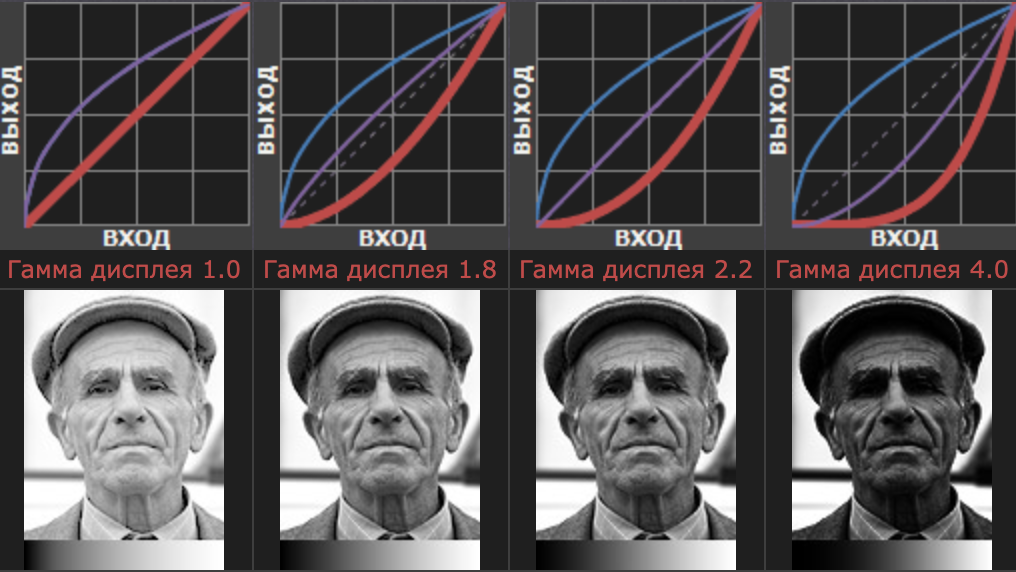

### Задание 4.1

Для чего нужен баланс белого?  
Ответ: Для коррекции цветов до естественного для человеческого глаза состояния. 

### Задание 4.2

С помощью чего можно привести яркость одного изображения к яркости другого?  
Ответ: Гистограмма яркости 

### Задание 4.3

Зачем нужна гамма-коррекция?  
Ответ: Для коррекции яркости изображения.




### ⚪️5. Скринкаст: skimage


→ Скачать ноутбук к скринкасту

	
В библиотеке skimage (scikit-image), предназначенной для обработки изображений, вы можете встретить похожие методы, которые мы уже разобрали в юните про библиотеку OpenCV.

→ Официальный сайт библиотеки skimage (https://scikit-image.org/docs/dev/api/skimage.html) 

Skimage содержит множество подмодулей. В каждом из них вы сможете найти различные способы обработки и преобразования картинок, например:

→ В подмодуле color находятся операции преобразования цветового пространства картинки:

**skimage.color.rgb2gray** — преобразование цветного изображения в чёрно-белое.  
**skimage.color.rgb2hsv** — преобразование цветового пространства в HSV.  

→ В подмодуле exposure хранятся инструменты для регулировки интенсивности изображения.  

**skimage.exposure.match_histograms** — сопоставление гистограмм; гистограмма входной картинки будет соответствовать гистограмме эталонного изображения.  
**exposure.rescale_intensity** — изменение уровня интенсивности картинки.  
**exposure.equalize_hist** — выравнивание гистограммы для улучшения контрастности изображений.  

→ Для более продвинутых операций в библиотеке есть такие подмодули, как feature, который позволяет извлекать различные признаки.

### Задание 5.1

Восстановите яркость темного изображения Меган Фокс по референсной картинке. Восстановленное изображение сохраните в переменную matched.

→ Исходное изображение.